# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing datasets

In [4]:
path = r'C:\Users\Aricia\MM-2020 Instacart Basket Analysis'

In [5]:
# Importing merged most up-to-date dataset
ords_prods_cst = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_csts_merged.pkl'))

In [6]:
#checking output
ords_prods_cst.shape

(32434212, 33)

In [7]:
ords_prods_cst.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,order_frequency,order_frequency_flag,Merge_flag49
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regular days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [8]:
ords_prods_cst.columns

Index(['user_id', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'Merge_flag', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_type', 'order_frequency', 'order_frequency_flag',
       'Merge_flag49'],
      dtype='object')

## Histogram

Text(0.5, 1.0, 'Frequency of orders per hour of the day')

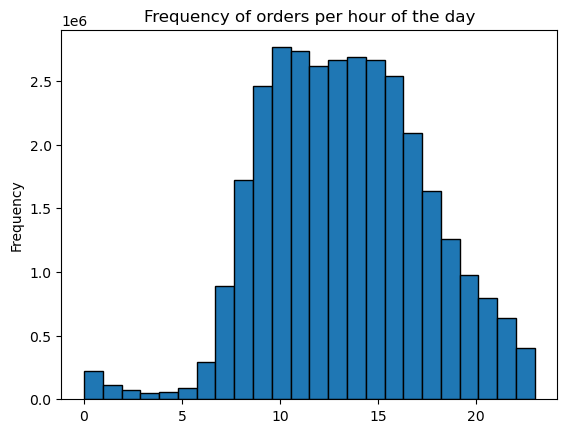

In [9]:
# Hour of the day column
hist = ords_prods_cst['order_hour_of_day'].plot.hist(bins = 24, edgecolor='black')
plt.title("Frequency of orders per hour of the day")

According to the histogram, Instacart order volume follows a predictable bell-shape curve throughout the day. The slowest time window happens between midnight and 6am, with volumes below 250,000 orders, reaching almost zero on its lowest. After 6am, the number of orders will start increasing significantly, reaching the busiest hours approximately between 9am and 5pm. These peak hours will maintain a volume above 2,500,000 orders. After that, the frequency starts to gradually decrease again, eventually leading back to the overnight low.

## Bar Chart

Text(0.5, 1.0, 'Customer loyalty distribution')

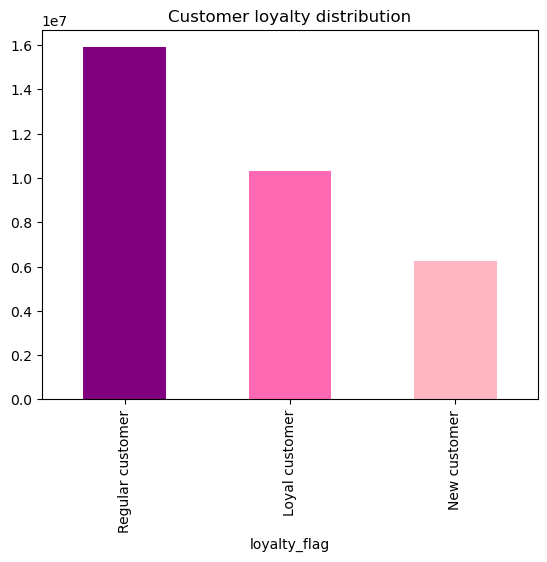

In [10]:
# Bar chart using loyalty flag
bar = ords_prods_cst['loyalty_flag'].value_counts().plot.bar(color=['purple', 'hotpink', 'lightpink'])
plt.title("Customer loyalty distribution")

## Line chart - hour_of_the_day vs prices

In [11]:
# Length of random numbers
len(ords_prods_cst)

32434212

In [12]:
# Random sample with 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cst)) <= 0.7

In [13]:
#Store 70% of the sample in the dataframe big
big = ords_prods_cst[dev]

In [14]:
# Store 30% of the sample in the dataframe small
small = ords_prods_cst[~dev]

In [15]:
# Checking accuracy
len(big) + len(small)

32434212

In [16]:
# Reducing sample to necessary columns
df_1 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Product prices per hour of the day')

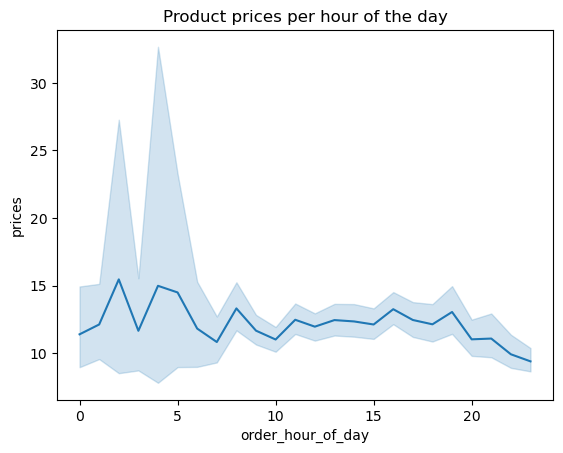

In [17]:
# Create a line chart hour of day vs prices
line = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices')
plt.title("Product prices per hour of the day")

It seems that the prices are mostly stable throughout the day, with products mostly between 10 and 20. However, when it comes to the slowest hours (between midnight and 6am), we can see some peak prices with higher outliers. As we noticed on previous histogram, those are slower hours, which means that outliers might have a higher impact on data.

## Line chart - Age vs number of dependants

In [18]:
# Reducing sample to necessary columns
df_2 = small[['Age','number_of_dependants']]

Text(0.5, 1.0, "Relationship between dependents and customer's age")

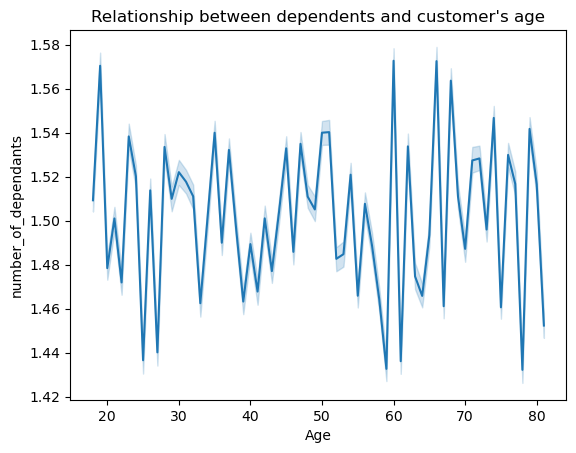

In [19]:
# Create a line chart hour of day vs prices
line1 = sns.lineplot(data = df_2, x = 'Age',y = 'number_of_dependants')
plt.title("Relationship between dependents and customer's age")

According to the line chart, apparently there is not much relation between number of dependents and customer's age. The number of dependents fluctuates around 1.5 across all age groups, showing high fluctuations up and down, which reiterates the lack of relationship.

## Scatterplot

Text(0.5, 1.0, "Customer's income vs age")

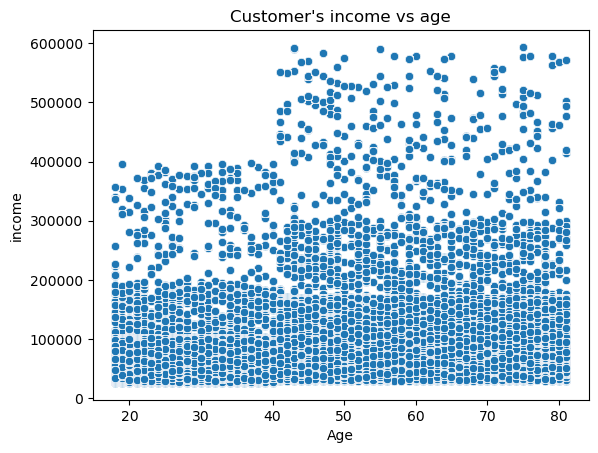

In [20]:
# Scatterplot of income vs age
scatterplot = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_cst)
plt.title("Customer's income vs age")

The broadest customer base have an income under 200,000 regardless of age. When it comes to incomes between 200,000 and 300,000 the age starts to influence the results, meaning that data becomes more scattered below age 40, and is more dense above 40. Regarding high-income customers, we can see a significant change, where data points become fewer and even more scattered. It's also noticeable that incomes above 400,000 begin to be observed from approximately the age 45 and above.

## Export visualizations

In [28]:
# Saving outside of Jupyter as an image
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hod.png'), bbox_inches='tight')

In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'), bbox_inches='tight')

In [30]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod.png'), bbox_inches='tight')

In [31]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'), bbox_inches='tight')

In [32]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'), bbox_inches='tight')